# Generating GW asymmetries with NRSur7dq4

## Prefix 

In [1]:
# import modules
import matplotlib.pyplot as plt
import numpy as np

import gwsurrogate as gws
import gwtools

lal.MSUN_SI != Msun
setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


In [2]:
# optional: load matplotlib style sheet (only if you have one)
plt.style.use("~/MA/fertige-MA/gitrepo/MATPLOTLIB_RCPARAMS.sty")
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [ ]:
# Download surrogate data (this can take a few minutes, but only has do be once)
gwsurrogate.catalog.pull('NRSur7dq4')

In [3]:
# load the NR surrogate
sur = gws.LoadSurrogate('NRSur7dq4')

Loaded NRSur7dq4 model


## Definition of the GW (2, $\pm$2)-mode asymmetry

- Gravitational wave harmonic decomposition:
$$h = \sum_{\ell \geq 2} \sum_{-\ell \leq m \leq \ell} h_{\ell m}(t, \Xi) \cdot {}^{-2}Y_{\ell m}(\theta, \phi)$$
- Time domain asymmetry in gravitational wave radiation: 
$$ h_{asym}(t) = \frac{h_{\ell,|m|}(t) - h^*_{\ell,-|m|}(t)}{2}$$
- Exponential form: 
$$h_{asym}(t) = A_{asym}(t) \cdot e^{i \phi_{asym}(t)}$$
- most dominant mode: $\ell=2$, $m = \pm2$

In [4]:
# define (2,2)-mode asymmetry in time domain
def calculate_asymmetry(h):
    '''
    Gets:     h, dictionary of available modes with (l, m) tuples as keys
    Returns:  h_asym_complex, array of time domain asymmetry
              h_asym_real, array of real part of time domain asymmetry
              h_asym_ampl, array of amplitude of time domain asymmetry
              h_asym_phase, array of phase of time domain asymmetry
    '''
    h_asym_complex = (h[(2,2)] - np.conjugate(h[(2,-2)]))/2
    h_asym_real = np.real(h_asym_complex)
    h_asym_ampl = np.abs(h_asym_complex)
    h_asym_phase = np.abs(np.unwrap(np.angle(h_asym_complex)))
    return h_asym_complex, h_asym_real, h_asym_ampl, h_asym_phase

## Evaluation of GW (2, $\pm$2)-mode asymmetry in units of total mass

In [5]:
q = 1
chi1 = [0.6, -0.2, 0.4]
chi2 = [-0.494, -0.395, 0.4]

dt = 0.1        # timestep size, Units of M
f_low = 0       # initial frequency, f_low=0 returns the full surrogate

# t is time array 
# h is a dictionary of available modes with (l, m) tuples as keys, for example h[(2,2)]
# dyn is a dictionary containing the frame dynamics and spin evolution
t, h, dyn = sur(q, chi1, chi2, dt=dt, f_low=f_low)

# calculate asymmetry 
h_asym_complex, h_asym_real, h_asym_ampl, h_asym_phase = calculate_asymmetry(h)

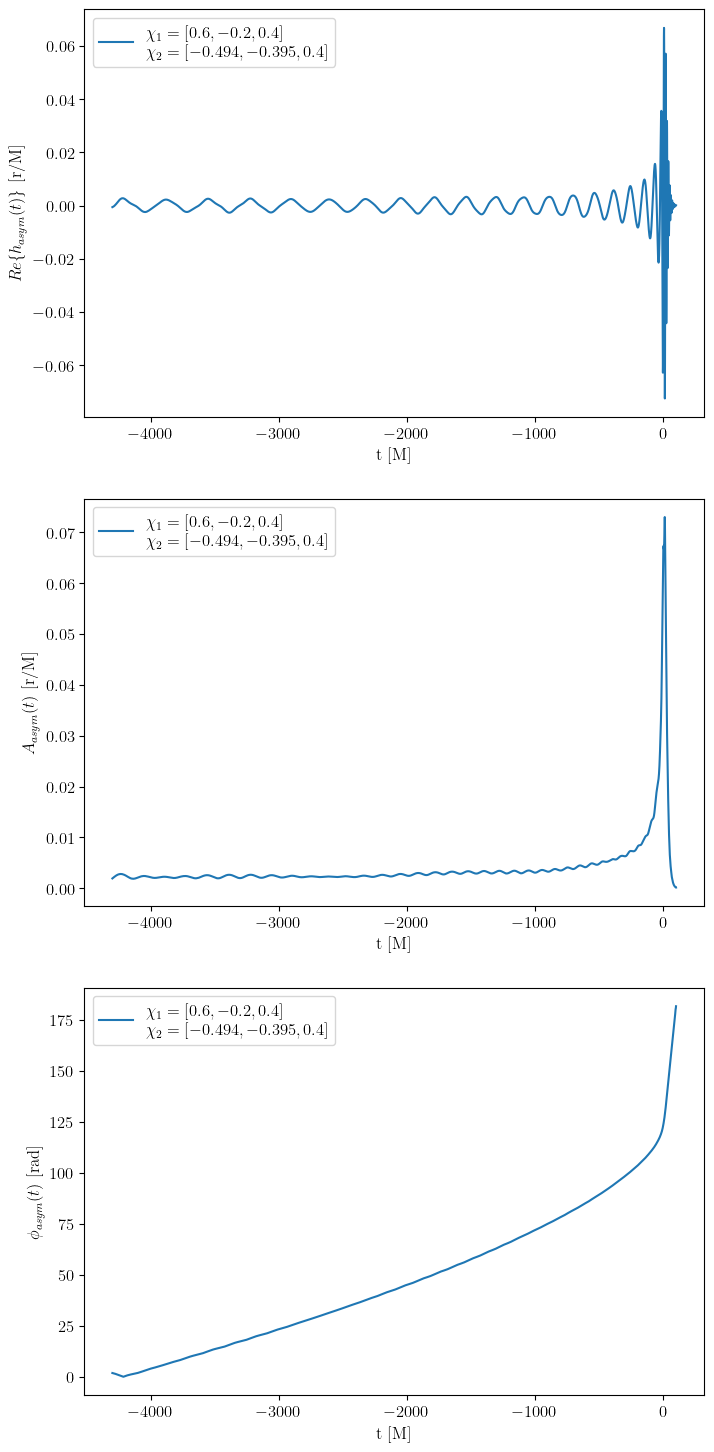

In [6]:
# setup plotting
fig = plt.figure(figsize = (8,18))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
label = r'$\chi_1 = %s$''\n'r'$\chi_2 = %s$' % (chi1, chi2)

# plotting real part of asymmetry 
ax1.plot(t, h_asym_real, label=label)
ax1.set_ylabel('$Re\{h_{asym}(t)\}$ [r/M]')
ax1.set_xlabel('t [M]')
ax1.legend()

# plotting amplitude of asymmetry 
ax2.plot(t, h_asym_ampl, label=label)
ax2.set_ylabel('$A_{asym}(t)$ [r/M]')
ax2.set_xlabel('t [M]')
ax2.legend()

# plotting phase of asymmetry
ax3.plot(t, h_asym_phase, label=label)
ax3.set_ylabel('$\phi_{asym}(t)$ [rad]')
ax3.set_xlabel('t [M]')
ax3.legend()

plt.show()

## Evaluation of GW (2, $\pm$2)-mode asymmetry in SI units

In [7]:
q = 2
chi1 = [0.6, -0.2, 0.4]
chi2 = [-0.494, -0.395, 0.4]
f_ref = 30         # Reference frequecny in Hz. The spins are assumed to specified at this frequency
f_low = 0          # initial frequency, f_low=0 returns the full surrogate
M = 70             # Total masss in solar masses
dist_mpc = 100     # distance in megaparsecs
dt = 1./4096       # step size in seconds
ellMax = 4         # Highest ell index for modes to use

# t is time array 
# h is a dictionary of available modes with (l, m) tuples as keys, for example h[(2,2)]
# dyn is a dictionary containing the frame dynamics and spin evolution
t, h, dyn = sur(q, chi1, chi1, dt=dt, f_low=f_low, f_ref=f_ref, ellMax=ellMax, M=M, dist_mpc=dist_mpc, units='mks')

# calculate asymmetry 
h_asym_complex, h_asym_real, h_asym_ampl, h_asym_phase = calculate_asymmetry(h)

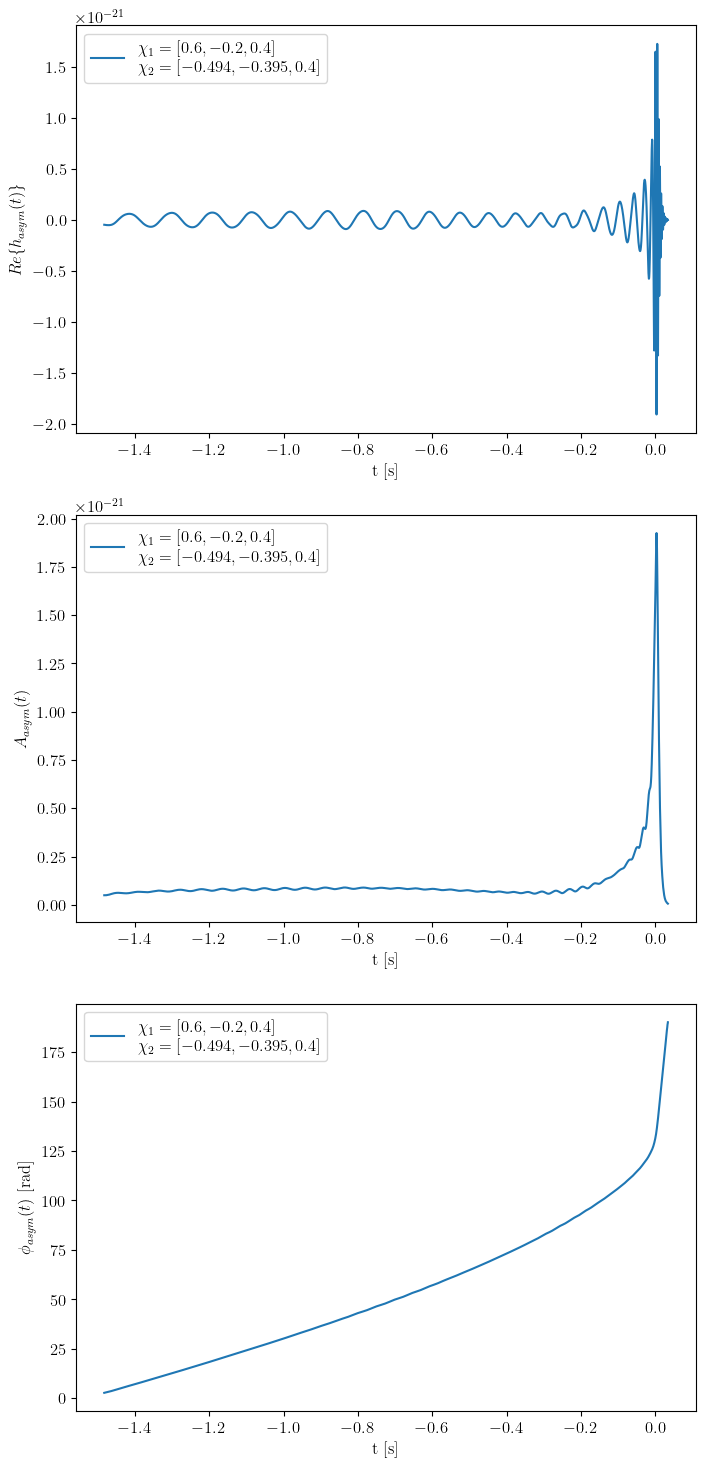

In [8]:
# setup plotting
fig = plt.figure(figsize = (8,18))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
label = r'$\chi_1 = %s$''\n'r'$\chi_2 = %s$' % (chi1, chi2)

# plotting real part of asymmetry 
ax1.plot(t, h_asym_real, label=label)
ax1.set_ylabel('$Re\{h_{asym}(t)\}$')
ax1.set_xlabel('t [s]')
ax1.legend()

# plotting amplitude of asymmetry 
ax2.plot(t, h_asym_ampl, label=label)
ax2.set_ylabel('$A_{asym}(t)$')
ax2.set_xlabel('t [s]')
ax2.legend()

# plotting phase of asymmetry
ax3.plot(t, h_asym_phase, label=label)
ax3.set_ylabel('$\phi_{asym}(t)$ [rad]')
ax3.set_xlabel('t [s]')
ax3.legend()

plt.show()

## Documentation of NRSur7dq4

In [9]:
help(sur)

Help on NRSur7dq4 in module gwsurrogate.surrogate object:

class NRSur7dq4(SurrogateEvaluator)
 |  NRSur7dq4(h5filename)
 |  
 |  A class for the NRSur7dq4 surrogate model presented in Varma et al. 2019,
 |  arxiv1905.09300.
 |  
 |  Evaluates gravitational waveforms generated by precessing binary black hole
 |  systems with generic mass ratios and spins.
 |  
 |  This model includes the following spin-weighted spherical harmonic modes:
 |  2<=ell<=4, -ell<=m<=ell.
 |  
 |  The parameter space of validity is:
 |  q \in [1, 6], and |chi1|,|chi2| \in [-1, 1], with generic directions.
 |  where q is the mass ratio and chi1/chi2 are the spin vectors of the
 |  heavier/lighter BH, respectively.
 |  
 |  The surrogate has been trained in the range
 |  q \in [1, 4] and |chi1|/|chi2| \in [-0.8, 0.8], but produces reasonable
 |  waveforms in the above range and has been tested against existing
 |  NR waveforms in that range.
 |  
 |  See the __call__ method on how to evaluate waveforms.
 |  
 |